In [1]:
import pandas as pd
import seaborn as sns
import os, code
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
import pprint
import copy, random
from scipy.stats import boxcox, anderson, shapiro
from fancyimpute import SoftImpute
from random import sample 
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
seed = 35
random.seed(seed)
np.random.seed(seed)


import gpflow as gpf
import tensorflow as tf

from gpflow.utilities import print_summary
#from gpflow.ci_utils import ci_niter

gpf.config.set_default_float(np.float64)
gpf.config.set_default_summary_fmt("notebook")
np.random.seed(0)
%matplotlib inline

#MAXITER = ci_niter(2000)


In [2]:
N = 100  # number of points
D = 1  # number of input dimensions
M = 15  # number of inducing points
L = 2  # number of latent GPs
P = 3  # number of observations = output dimensions
def generate_data(N=100):
    X = np.random.rand(N)[:, None] * 10 - 5  # Inputs = N x D
    G = np.hstack((0.5 * np.sin(3 * X) + X, 3.0 * np.cos(X) - X))  # G = N x L
    W = np.array([[0.5, -0.3, 1.5], [-0.4, 0.43, 0.0]])  # L x P
    F = np.matmul(G, W)  # N x P
    Y = F + np.random.randn(*F.shape) * [0.2, 0.2, 0.2]

    return X, Y


In [3]:
X, Y = data = generate_data(N)
Zinit = np.linspace(-5, 5, M)[:, None]

In [4]:
Zinit
#Y.shape
#X.shape

(100, 1)

In [5]:
# create multi-output kernel
kernel = gpf.kernels.SharedIndependent(
    gpf.kernels.SquaredExponential() + gpf.kernels.Linear(), output_dim=P
)
# initialization of inducing input locations (M random points from the training inputs)
Z = Zinit.copy()
# create multi-output inducing variables from Z
iv = gpf.inducing_variables.SharedIndependentInducingVariables(
    gpf.inducing_variables.InducingPoints(Z)
)

In [6]:
# create SVGP model as usual and optimize
m = gpf.models.SVGP(kernel, gpf.likelihoods.Gaussian(), inducing_variable=iv, num_latent_gps=P)
print_summary(m)

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.9999999999999999
SVGP.kernel.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.9999999999999999
SVGP.kernel.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.9999999999999999
SVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SVGP.inducing_variable.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[-5....
SVGP.q_mu,Parameter,Identity,,True,"(15, 3)",float64,"[[0., 0., 0...."
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(3, 15, 15)",float64,"[[[1., 0., 0...."


In [7]:
def optimize_model_with_scipy(model):
    optimizer = gpf.optimizers.Scipy()
    optimizer.minimize(
        model.training_loss_closure(data),
        variables=model.trainable_variables,
        method="l-bfgs-b",
        options={"disp": 50},
    )


optimize_model_with_scipy(m)

In [8]:
print_summary(m)

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.9275753772573355
SVGP.kernel.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.7982660494614399
SVGP.kernel.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,1.21064
SVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.03966138166704286
SVGP.inducing_variable.inducing_variable.Z,Parameter,Identity,,True,"(15, 1)",float64,[[-4.83942...
SVGP.q_mu,Parameter,Identity,,True,"(15, 3)",float64,"[[-0.90209162, 0.69939949, -1.47582..."
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(3, 15, 15)",float64,"[[[1.71326536e-02, 0.00000000e+00, 0.00000000e+00..."


In [2]:
#Downloading "elected feature versions"
!gdown --id 1hsiCAqQVWFLchOJIPa1XE11Om0UVfBpA
!gdown --id 1FtaSHoMD_ue-6f3p9iqARPEPHENsvpdd
!gdown --id 1_ZXmmZiyC7QjXPMuTb-ukmqCeG05gnI_
!gdown --id 1jz8rYm9Q6cXPXIU5_nOrdTBRzYXFwzcD

#!mkdir "dataset_cleaned"
!mv t_plus_0_selected.csv ./dataset_cleaned/t_plus_0.csv
!mv t_plus_6_selected.csv ./dataset_cleaned/t_plus_6.csv
!mv t_plus_12_selected.csv ./dataset_cleaned/t_plus_12.csv
!mv t_plus_24_selected.csv ./dataset_cleaned/t_plus_24.csv


#Downloading "all feature versions"
!gdown --id 1G5PfjNgDvSS3FC-Zz1bkJc8A9GvJAp7F
!gdown --id 1X9rJThgxsG7S2RgYf2nmPia0zFHyu6k8
!gdown --id 11b6jkE4kkFiwAiwyV92Zen3PhTbfUw8H
!gdown --id 1-kkUTaXH7Pa4pn5UOqHXhPCuLASaHWTJ

!mkdir "dataset_cleaned"
!mv t_plus_0.csv ./dataset_cleaned/t_plus_0.csv
!mv t_plus_6.csv ./dataset_cleaned/t_plus_6.csv
!mv t_plus_12.csv ./dataset_cleaned/t_plus_12.csv
!mv t_plus_24.csv ./dataset_cleaned/t_plus_24.csv

C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hsiCAqQVWFLchOJIPa1XE11Om0UVfBpA
To: c:\Users\sarah\Desktop\clustring2\t_plus_0_selected.csv

  0%|          | 0.00/2.71M [00:00<?, ?B/s]
 19%|█▉        | 524k/2.71M [00:00<00:01, 1.62MB/s]
 58%|█████▊    | 1.57M/2.71M [00:00<00:00, 3.98MB/s]
100%|██████████| 2.71M/2.71M [00:00<00:00, 5.33MB/s]
C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FtaSHoMD_ue-6f3p9iqARPEPHENsvpdd
To: c:\Users\sarah\Desktop\clustring2\t_plus_6_selected.csv

  0%|          | 0

In [3]:
t_plus_0 = pd.read_csv("C:\\Users\\sarah\\Desktop\\clustring\\t_plus_0.csv")
t_plus_6 = pd.read_csv("C:\\Users\\sarah\\Desktop\\clustring\\t_plus_6.csv")
t_plus_12 = pd.read_csv("C:\\Users\\sarah\\Desktop\\clustring\\t_plus_12.csv")
t_plus_24 = pd.read_csv("C:\\Users\\sarah\\Desktop\\clustring\\t_plus_24.csv")

display(t_plus_0)
display(t_plus_6)
display(t_plus_12)
display(t_plus_24)

,Unnamed: 0,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,0,55_0,55,0,10.0,6.0,15.0,0.0,1,0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,1,55_6,55,6,8.0,10.0,34.0,0.0,1,0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,2,55_12,55,12,10.0,10.0,41.0,0.0,0,0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230
3,3,55_36,55,36,17.0,18.0,51.0,0.0,0,0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,4,942_6,942,6,8.0,2.0,21.0,0.0,1,0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1063,64674_84,64674,84,11.0,15.0,45.0,4.0,0,1,...,-1.013035,-0.298040,0.119472,-0.340873,-0.100552,3.201959e-01,-0.369597,-0.121252,-0.617844,-1.273943
1064,1064,65043_0,65043,0,2.0,6.0,16.0,0.0,1,0,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741
1065,1065,65043_12,65043,12,4.0,7.0,14.0,0.0,0,1,...,-0.233840,-1.127788,-0.318658,-0.764212,0.749520,1.337026e-02,0.619255,-0.428631,0.061268,1.448058
1066,1066,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0,...,0.826845,-1.298064,-0.371371,-0.026507,0.914088,7.659235e-01,0.264216,0.583757,0.626436,1.606781


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,942_12,942,12,5.0,2.0,25.0,0.0,1,0.0,0.0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
3,4161_6,4161,6,1.0,2.0,0.0,0.0,1,0.0,0.0,...,0.513933,-0.103414,5.150458,-1.068824,3.127791,3.021664e+00,4.572503,-1.170921,1.648876,1.479698
4,4161_12,4161,12,6.0,3.0,11.0,0.0,1,0.0,0.0,...,0.219667,-0.168165,3.573893,-1.031249,1.938504,2.090804e+00,2.431792,-0.590648,1.006302,0.445720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,62792_12,62792,12,0.0,2.0,6.0,0.0,0,0.0,0.0,...,1.305322,0.527260,-0.274584,0.187122,-0.792183,-5.817809e-01,-0.584742,-0.631526,0.452749,1.228353
133,64669_6,64669,6,17.0,20.0,33.0,0.0,1,0.0,0.0,...,-0.030208,-0.237974,-0.567505,-0.282821,0.260058,1.795770e-01,0.095608,0.520648,0.044837,0.317250
134,64669_12,64669,12,12.0,9.0,17.0,0.0,0,0.0,0.0,...,-0.821640,-0.429204,-1.414246,0.102774,-0.587205,-7.137197e-02,-1.190180,-0.434469,-0.823542,-0.748557
135,64674_6,64674,6,11.0,7.0,20.0,0.0,1,0.0,0.0,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,942_24,942,24,2.0,3.0,23.0,0.0,1,0.0,0.0,...,-0.789401,0.476630,-1.322671,-0.385579,-0.116892,3.745248e-02,-0.791790,-0.428016,0.833000,-0.288862
2,1517_36,1517,36,20.0,17.0,31.0,8.0,0,0.0,1.0,...,-0.430276,-0.488158,-0.016053,0.299646,0.352545,1.538711e-17,-0.294976,-0.314593,1.510641,-0.120622
3,1923_36,1923,36,3.0,0.0,1.0,0.0,1,0.0,0.0,...,-0.022314,1.513233,-0.327563,-1.765880,-0.106601,5.916097e-01,-0.871440,1.019350,0.115268,0.000110
4,2660_12,2660,12,0.0,0.0,1.0,0.0,1,0.0,0.0,...,0.439098,-0.573117,0.294532,-1.147853,-0.988674,-7.721526e-01,-0.504843,-1.199678,0.278990,-0.564264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,64669_60,64669,60,15.0,15.0,38.0,0.0,0,1.0,0.0,...,-0.286737,-0.056313,2.786998,-0.072588,-0.629286,-4.880779e-01,0.830545,-1.023279,0.124134,0.400114
539,64674_12,64674,12,9.0,9.0,18.0,0.0,1,0.0,0.0,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102
540,64674_24,64674,24,12.0,12.0,26.0,0.0,1,0.0,0.0,...,-0.721871,0.301472,-0.391917,1.295885,-0.430286,4.220977e-01,-0.489392,-0.181624,-0.699201,-1.277501
541,65043_12,65043,12,4.0,7.0,14.0,0.0,0,0.0,0.0,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230
1,942_48,942,48,2.0,6.0,35.0,0.0,1,0.0,0.0,...,-0.694835,0.266455,-0.274579,-0.746071,1.124902,1.172466e+00,-0.020745,0.682818,0.337212,-0.940755
2,1517_24,1517,24,19.0,11.0,28.0,3.0,0,0.0,1.0,...,-0.681357,-0.560358,0.272203,-0.113746,-0.142970,1.538711e-17,-0.831861,-0.320798,0.680701,0.490059
3,1517_60,1517,60,19.0,18.0,39.0,10.0,0,0.0,1.0,...,-1.129476,0.122543,-0.428094,-0.010179,-0.455504,1.538711e-17,-0.389864,-0.057324,-0.334423,-0.481698
4,1923_24,1923,24,2.0,0.0,1.0,0.0,1,0.0,0.0,...,-0.547583,-0.218060,-0.621023,-1.696462,0.735295,3.846569e-01,-1.736178,0.340810,-0.549260,0.234053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,63889_60,63889,60,6.0,5.0,28.0,2.0,0,1.0,0.0,...,-1.228121,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790
431,64674_24,64674,24,12.0,12.0,26.0,0.0,1,0.0,0.0,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102
432,64674_48,64674,48,11.0,17.0,46.0,1.0,0,0.0,0.0,...,-0.993341,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933
433,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0.0,0.0,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741


In [14]:
def get_cv_dictionary(df):
    patient_ids = df['patient_id'].unique()
    kf = KFold(n_splits=5, shuffle= True, random_state=42)
    dic = {}
    print('patient_ids')
    print(patient_ids)
    for idx, (train_index, test_index) in enumerate(kf.split(patient_ids)):
        patient_train = patient_ids[train_index]
        patient_test = patient_ids[test_index]
        df_train_idx = np.where(df['patient_id'].isin(patient_train))[0]
        df_test_idx = np.where(df['patient_id'].isin(patient_test))[0]
        dic[idx] = (df_train_idx, df_test_idx)
    return dic


In [15]:
def custum_cv(X):
	for i in custom_cv_dic:
		yield custom_cv_dic[i]

In [24]:
from sklearn.model_selection import KFold

updrs_list = ['updrs_1','updrs_2','updrs_3']#,'updrs_4']

df = pd.read_csv("./dataset_cleaned/t_plus_0.csv")
global custom_cv_dic
custom_cv_dic = get_cv_dictionary(df)

display(df)
df_X = df[df.columns[10:]]
df_y = df[updrs_list]

patient_ids
[   55   942  1517  1923  2660  3636  3863  4161  4172  4923  5027  5036
  5178  5645  5742  6054  6211  6420  7051  7117  7151  7265  7508  7568
  7832  7886  8344  8699 10053 10138 10174 10541 10715 10718 11459 11686
 11928 12516 12636 12703 12755 12931 13360 13368 13618 13804 13852 13968
 14035 14124 14242 14270 14344 14450 14811 15009 15245 15504 15590 16238
 16347 16566 16574 16778 16931 17154 17201 17414 17727 18183 18204 18553
 18560 19088 20212 20216 20352 20404 20460 20581 20664 20707 20791 20792
 21126 21537 21729 22126 22623 23175 23192 23244 23391 23636 24278 24690
 24818 24820 24911 25562 25739 25750 25827 25911 26005 26104 26210 26809
 27079 27300 27464 27468 27607 27715 27872 27893 27971 27987 28327 28342
 28818 29313 29417 30119 30155 30416 30894 30951 31121 31154 31270 31693
 33108 33548 33558 34182 35231 35465 35477 35675 35696 36797 37220 37312
 37566 38419 39144 39719 40022 40200 40340 40650 40751 40798 40874 40876
 40967 40980 41444 41617 41628 41871 41

,Unnamed: 0,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,0,55_0,55,0,10.0,6.0,15.0,0.0,1,0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,1,55_6,55,6,8.0,10.0,34.0,0.0,1,0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,2,55_12,55,12,10.0,10.0,41.0,0.0,0,0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230
3,3,55_36,55,36,17.0,18.0,51.0,0.0,0,0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,4,942_6,942,6,8.0,2.0,21.0,0.0,1,0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1063,64674_84,64674,84,11.0,15.0,45.0,4.0,0,1,...,-1.013035,-0.298040,0.119472,-0.340873,-0.100552,3.201959e-01,-0.369597,-0.121252,-0.617844,-1.273943
1064,1064,65043_0,65043,0,2.0,6.0,16.0,0.0,1,0,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741
1065,1065,65043_12,65043,12,4.0,7.0,14.0,0.0,0,1,...,-0.233840,-1.127788,-0.318658,-0.764212,0.749520,1.337026e-02,0.619255,-0.428631,0.061268,1.448058
1066,1066,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0,...,0.826845,-1.298064,-0.371371,-0.026507,0.914088,7.659235e-01,0.264216,0.583757,0.626436,1.606781


In [26]:
updrs_list+ df.columns[10:].values.tolist()

['updrs_1',
 'updrs_2',
 'updrs_3',
 'updrs_4',
 'upd23b_On',
 'O00391',
 'O00533',
 'O00584',
 'O14498',
 'O14773',
 'O14791',
 'O15240',
 'O15394',
 'O43505',
 'O60888',
 'O75144',
 'O75326',
 'O94919',
 'P00441',
 'P00450',
 'P00734',
 'P00736',
 'P00738',
 'P00746',
 'P00747',
 'P00748',
 'P00751',
 'P01008',
 'P01009',
 'P01011',
 'P01019',
 'P01023',
 'P01024',
 'P01031',
 'P01033',
 'P01034',
 'P01042',
 'P01344',
 'P01591',
 'P01608',
 'P01621',
 'P01717',
 'P01780',
 'P01833',
 'P01834',
 'P01857',
 'P01859',
 'P01860',
 'P01861',
 'P01876',
 'P01877',
 'P02452',
 'P02647',
 'P02649',
 'P02652',
 'P02655',
 'P02656',
 'P02671',
 'P02675',
 'P02679',
 'P02747',
 'P02748',
 'P02749',
 'P02750',
 'P02751',
 'P02753',
 'P02760',
 'P02763',
 'P02765',
 'P02766',
 'P02768',
 'P02774',
 'P02787',
 'P02790',
 'P04004',
 'P04075',
 'P04156',
 'P04180',
 'P04196',
 'P04207',
 'P04211',
 'P04216',
 'P04217',
 'P04275',
 'P04406',
 'P04433',
 'P05060',
 'P05067',
 'P05090',
 'P05155',
 'P

In [27]:
df[updrs_list+ df.columns[10:].values.tolist()]

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_On,O00391,O00533,O00584,O14498,O14773,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,10.0,6.0,15.0,0.0,0,-0.124879,0.955709,1.225520,1.676400,1.889746,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,8.0,10.0,34.0,0.0,0,0.553678,0.519166,0.817095,1.649031,1.188844,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,10.0,10.0,41.0,0.0,1,1.297876,1.309572,1.418748,1.468253,1.815104,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230
3,17.0,18.0,51.0,0.0,1,0.684179,1.047338,1.549556,1.909699,2.216530,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,8.0,2.0,21.0,0.0,0,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,11.0,15.0,45.0,4.0,0,-1.182237,-1.364512,-0.147865,-1.036248,-1.059225,...,-1.013035,-0.298040,0.119472,-0.340873,-0.100552,3.201959e-01,-0.369597,-0.121252,-0.617844,-1.273943
1064,2.0,6.0,16.0,0.0,0,0.663424,1.792806,1.513308,1.928536,0.330038,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741
1065,4.0,7.0,14.0,0.0,0,0.898873,2.035543,0.234165,1.784275,1.068374,...,-0.233840,-1.127788,-0.318658,-0.764212,0.749520,1.337026e-02,0.619255,-0.428631,0.061268,1.448058
1066,4.0,8.0,0.0,0.0,0,1.085314,2.366783,1.866893,1.294721,0.595490,...,0.826845,-1.298064,-0.371371,-0.026507,0.914088,7.659235e-01,0.264216,0.583757,0.626436,1.606781


In [28]:
updrs_list = ['updrs_1','updrs_2','updrs_3','updrs_4']

df = pd.read_csv("./dataset_cleaned/t_plus_0.csv")
df

,Unnamed: 0,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,0,55_0,55,0,10.0,6.0,15.0,0.0,1,0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
1,1,55_6,55,6,8.0,10.0,34.0,0.0,1,0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,2,55_12,55,12,10.0,10.0,41.0,0.0,0,0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230
3,3,55_36,55,36,17.0,18.0,51.0,0.0,0,0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,4,942_6,942,6,8.0,2.0,21.0,0.0,1,0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1063,64674_84,64674,84,11.0,15.0,45.0,4.0,0,1,...,-1.013035,-0.298040,0.119472,-0.340873,-0.100552,3.201959e-01,-0.369597,-0.121252,-0.617844,-1.273943
1064,1064,65043_0,65043,0,2.0,6.0,16.0,0.0,1,0,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741
1065,1065,65043_12,65043,12,4.0,7.0,14.0,0.0,0,1,...,-0.233840,-1.127788,-0.318658,-0.764212,0.749520,1.337026e-02,0.619255,-0.428631,0.061268,1.448058
1066,1066,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0,...,0.826845,-1.298064,-0.371371,-0.026507,0.914088,7.659235e-01,0.264216,0.583757,0.626436,1.606781


In [29]:
df_0 = df.loc[df['visit_month'] == 0]
df_0

,Unnamed: 0,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,0,55_0,55,0,10.0,6.0,15.0,0.0,1,0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
8,8,1517_0,1517,0,11.0,6.0,25.0,5.0,0,0,...,-0.681357,-0.560358,0.272203,-0.113746,-0.142970,1.538711e-17,-0.831861,-0.320798,0.680701,0.490059
12,12,1923_0,1923,0,2.0,0.0,0.0,0.0,1,0,...,-0.547583,-0.218060,-0.621023,-1.696462,0.735295,3.846569e-01,-1.736178,0.340810,-0.549260,0.234053
15,15,2660_0,2660,0,2.0,0.0,0.0,0.0,1,0,...,0.439098,-0.573117,0.294532,-1.147853,-0.988674,-7.721526e-01,-0.504843,-1.199678,0.278990,-0.564264
19,19,3636_0,3636,0,1.0,2.0,9.0,0.0,1,0,...,-0.425525,-1.412454,-0.349400,-1.105127,-0.249867,-8.263727e-02,-0.708270,-1.498983,-0.109597,-0.784175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1042,63875_0,63875,0,3.0,2.0,4.0,0.0,1,0,...,-0.151017,0.577944,0.055253,-0.099275,-0.817780,1.538711e-17,-0.322795,-0.097593,-0.612987,-0.166880
1047,1047,63889_0,63889,0,7.0,3.0,30.0,0.0,0,1,...,-1.428475,0.483048,-0.219588,-0.012802,-0.694598,-3.396826e-01,-0.423899,-1.447995,-1.039839,0.142942
1053,1053,64669_0,64669,0,12.0,14.0,27.0,0.0,1,0,...,-0.030208,-0.237974,-0.567505,-0.282821,0.260058,1.795770e-01,0.095608,0.520648,0.044837,0.317250
1058,1058,64674_0,64674,0,5.0,1.0,13.0,0.0,1,0,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102


In [32]:
df_0_data = df_0[updrs_list+ df_0.columns[10:].values.tolist()]
df_0_data

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_On,O00391,O00533,O00584,O14498,O14773,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,10.0,6.0,15.0,0.0,0,-0.124879,0.955709,1.225520,1.676400,1.889746,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
8,11.0,6.0,25.0,5.0,1,0.015360,-0.386115,0.801469,-0.399527,-0.033815,...,-0.681357,-0.560358,0.272203,-0.113746,-0.142970,1.538711e-17,-0.831861,-0.320798,0.680701,0.490059
12,2.0,0.0,0.0,0.0,0,3.467281,1.531780,0.519015,1.785097,-0.605532,...,-0.547583,-0.218060,-0.621023,-1.696462,0.735295,3.846569e-01,-1.736178,0.340810,-0.549260,0.234053
15,2.0,0.0,0.0,0.0,0,0.661832,0.302378,0.165766,0.302160,0.199135,...,0.439098,-0.573117,0.294532,-1.147853,-0.988674,-7.721526e-01,-0.504843,-1.199678,0.278990,-0.564264
19,1.0,2.0,9.0,0.0,0,-0.255416,-1.035216,-1.412673,-1.372240,-1.545117,...,-0.425525,-1.412454,-0.349400,-1.105127,-0.249867,-8.263727e-02,-0.708270,-1.498983,-0.109597,-0.784175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,3.0,2.0,4.0,0.0,0,-0.493637,0.226771,0.477002,-0.586269,0.969624,...,-0.151017,0.577944,0.055253,-0.099275,-0.817780,1.538711e-17,-0.322795,-0.097593,-0.612987,-0.166880
1047,7.0,3.0,30.0,0.0,0,-0.403548,-0.428945,-0.080383,-0.732534,-0.438872,...,-1.428475,0.483048,-0.219588,-0.012802,-0.694598,-3.396826e-01,-0.423899,-1.447995,-1.039839,0.142942
1053,12.0,14.0,27.0,0.0,0,-0.284025,-0.076363,-0.021089,-0.072036,-0.326266,...,-0.030208,-0.237974,-0.567505,-0.282821,0.260058,1.795770e-01,0.095608,0.520648,0.044837,0.317250
1058,5.0,1.0,13.0,0.0,0,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102


In [45]:
# Assuming df_0 contains the updrs columns and df_0_y_test is your test set
# Select the updrs columns from df_0 or any other relevant dataframe

updrs_list = ['updrs_1', 'updrs_2', 'updrs_3']  

# Convert the updrs columns to a NumPy array and display
df_updrs_values = df_0[updrs_list].to_numpy()
print(df_updrs_values)


[[10.  6. 15.]
 [11.  6. 25.]
 [ 2.  0.  0.]
 [ 2.  0.  0.]
 [ 1.  2.  9.]
 [ 8. 13. 36.]
 [ 6.  1.  0.]
 [ 2.  0.  0.]
 [ 1.  0.  0.]
 [ 9.  1.  3.]
 [12.  7. 17.]
 [ 5.  7. 38.]
 [ 7.  5. 17.]
 [ 5. 11.  9.]
 [ 4.  8. 18.]
 [ 4.  0.  0.]
 [ 4.  0.  0.]
 [ 4.  1. 16.]
 [17. 13. 11.]
 [ 3.  0. 13.]
 [ 3.  0.  2.]
 [ 2.  2. 13.]
 [ 2.  6. 21.]
 [ 0.  0.  5.]
 [17. 13. 30.]
 [ 2.  0.  1.]
 [ 2.  2. 14.]
 [ 3.  0.  0.]
 [ 0.  0.  0.]
 [ 3.  2.  0.]
 [ 6.  3. 16.]
 [ 3.  3. 17.]
 [12. 20. 36.]
 [ 4.  0.  9.]
 [ 8.  1.  0.]
 [ 5. 15. 22.]
 [ 8.  2. 15.]
 [ 3.  0.  0.]
 [14.  9. 33.]
 [ 8. 11. 22.]
 [ 0.  0.  7.]
 [ 7.  2.  5.]
 [ 3.  3.  7.]
 [ 2.  0.  1.]
 [ 9. 10. 19.]
 [ 4.  0.  0.]
 [16.  8. 28.]
 [ 0.  0.  7.]
 [ 3.  0.  1.]
 [ 4.  4. 18.]
 [ 1.  2. 15.]
 [ 1.  1. 12.]
 [ 1.  3. 20.]
 [ 1.  6. 46.]
 [ 2.  1.  2.]
 [ 1.  0.  3.]
 [ 0.  3. 41.]
 [ 1.  2. 14.]
 [ 4. 12. 29.]
 [ 0.  0.  0.]
 [10.  2. 13.]
 [ 5.  5. 23.]
 [ 1.  3.  6.]
 [15.  9. 17.]
 [ 2.  4. 10.]
 [ 6.  2.  7.]
 [ 2.  0. 

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge,LinearRegression,ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
import time


In [4]:
#Downloding "training_result.csv"
!gdown --id "1TBW4eX-TqEas16MyqFrSDDJPOftHVchd"
df_result = pd.read_csv("training_result.csv")
display(df_result)

C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TBW4eX-TqEas16MyqFrSDDJPOftHVchd
To: c:\Users\sarah\Desktop\clustring2\training_result.csv

  0%|          | 0.00/11.9k [00:00<?, ?B/s]
100%|██████████| 11.9k/11.9k [00:00<00:00, 619kB/s]


,file_name,updrs,model_name,SMAPE,hyperparameter,run_time
0,t_plus_24.csv,updrs_1,LinearRegression,89.087686,{},1.860677
1,t_plus_24.csv,updrs_1,DecisionTreeRegressor,66.590190,{'max_depth': 2| 'max_features': 'auto'| 'min_...,4.586350
2,t_plus_24.csv,updrs_1,ElasticNet,68.451743,{'alpha': 1.0| 'l1_ratio': 0.5| 'max_iter': 10...,2.095971
3,t_plus_24.csv,updrs_1,BayesianRidge,71.807892,{'alpha_1': 1e-06| 'alpha_2': 0.0001| 'lambda_...,32.486337
4,t_plus_24.csv,updrs_1,GradientBoostingRegressor,64.765947,{'learning_rate': 0.01| 'max_depth': 5| 'min_s...,723.197722
...,...,...,...,...,...,...
75,t_plus_12.csv,updrs_4,LinearRegression,169.433565,{},0.071327
76,t_plus_12.csv,updrs_4,DecisionTreeRegressor,156.677600,{'max_depth': None| 'max_features': 'auto'| 'm...,4.967446
77,t_plus_12.csv,updrs_4,ElasticNet,166.870845,{'alpha': 0.1| 'l1_ratio': 0.9| 'max_iter': 10...,2.022488
78,t_plus_12.csv,updrs_4,BayesianRidge,168.050748,{'alpha_1': 0.0001| 'alpha_2': 1e-06| 'lambda_...,31.342518


C:\Users\sarah\AppData\Local\Temp\ipykernel_3972\2696714270.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["LR", "DTR", "EN", "BR", "GBR" ])


[Text(0, 0, 'LR'),
 Text(1, 0, 'DTR'),
 Text(2, 0, 'EN'),
 Text(3, 0, 'BR'),
 Text(4, 0, 'GBR')]

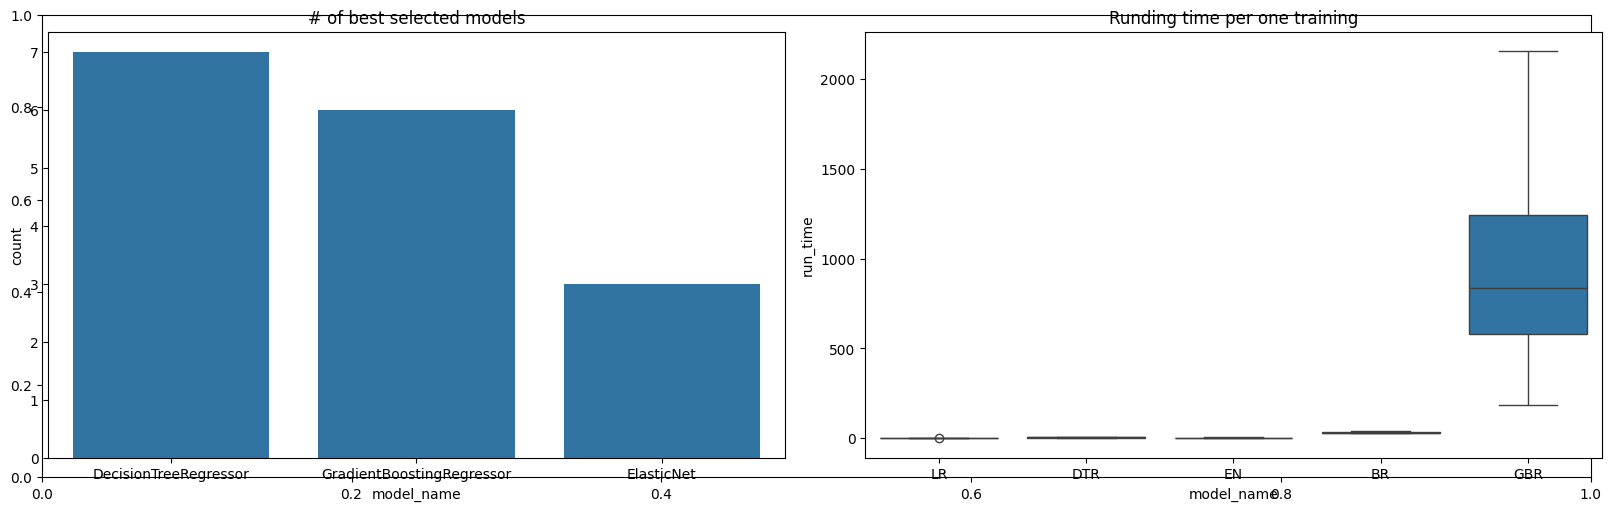

In [5]:
df_result = pd.read_csv("training_result.csv")
mix_SMAPE_row = df_result.loc[df_result.groupby(['file_name', 'updrs'])['SMAPE'].idxmin()]
mix_SMAPE_row.to_csv("result_cleaned.csv", index=False)

df_result.columns

plt.subplots(figsize=(16,5),constrained_layout=True)

plt.subplot(1, 2, 1)
ax = sns.countplot(x=mix_SMAPE_row["model_name"])
ax.set_title("# of best selected models")

plt.subplot(1,2, 2)
ax = sns.boxplot(data = df_result, x="model_name", y="run_time")
ax.set_title("Runding time per one training")
ax.set_xticklabels(["LR", "DTR", "EN", "BR", "GBR" ])


In [7]:

df = pd.read_csv('training_result.csv')
max_SMAPE_row = df.loc[df.groupby(['file_name', 'updrs'])['SMAPE'].idxmin()]
max_SMAPE_row.to_csv("result_cleaned.csv", index=False)

file_dic = {"t_plus_0.csv":"t_plus_0","t_plus_6.csv":"t_plus_6","t_plus_12.csv":"t_plus_12","t_plus_24.csv":"t_plus_24"}
models = {"LinearRegression":LinearRegression(),"DecisionTreeRegressor":DecisionTreeRegressor(random_state=42),"ElasticNet":ElasticNet(random_state=42),"BayesianRidge":BayesianRidge(),"GradientBoostingRegressor":GradientBoostingRegressor(random_state=42)}


model_dic = {
"t_plus_0": {"updrs_1":None,"updrs_2":None,"updrs_3":None,"updrs_4":None},
"t_plus_6": {"updrs_1":None,"updrs_2":None,"updrs_3":None,"updrs_4":None},
"t_plus_12":{"updrs_1":None,"updrs_2":None,"updrs_3":None,"updrs_4":None},
"t_plus_24":{"updrs_1":None,"updrs_2":None,"updrs_3":None,"updrs_4":None}}


for row in max_SMAPE_row.iterrows():
    file_name = row[1]["file_name"]
    updrs = row[1]["updrs"]
    hyperparameter = eval(row[1]["hyperparameter"].replace("|", ","))
    run_time = row[1]["run_time"]
    model_name = row[1]["model_name"]

    # Correct 'max_features' if it's 'auto' for DecisionTreeRegressor
    if model_name == "DecisionTreeRegressor" and 'max_features' in hyperparameter and hyperparameter['max_features'] == 'auto':
        hyperparameter['max_features'] = None  # Set to None or another valid option such as 'sqrt', 'log2', or an integer

    model = models[model_name]
    model.__init__(**hyperparameter)

    df_total = pd.read_csv("./dataset_cleaned/" + file_name)

    idx = list(df_total.columns).index("updrs_4") + 1
    df_y = df_total[updrs]
    df_X = df_total[df_total.columns[idx:]]
    model.fit(df_X, df_y)

    model_dic[file_dic[file_name]][updrs] = {"model": models[model_name].__init__(**hyperparameter), "X": df_X, "y": df_y}

pickle.dump(model_dic, open("prediction_models.pkl", "wb"))


In [9]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import shap
import numpy as np

# Load data
df = pd.read_csv('training_result.csv')
max_SMAPE_row = df.loc[df.groupby(['file_name', 'updrs'])['SMAPE'].idxmin()]
max_SMAPE_row.to_csv("result_cleaned.csv", index=False)

# Define models and file dictionary
file_dic = {
    "t_plus_0.csv": "t_plus_0",
    "t_plus_6.csv": "t_plus_6",
    "t_plus_12.csv": "t_plus_12",
    "t_plus_24.csv": "t_plus_24"
}

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "BayesianRidge": BayesianRidge(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

# Initialize model dictionary
model_dic = {
    "t_plus_0": {"updrs_1": None, "updrs_2": None, "updrs_3": None, "updrs_4": None},
    "t_plus_6": {"updrs_1": None, "updrs_2": None, "updrs_3": None, "updrs_4": None},
    "t_plus_12": {"updrs_1": None, "updrs_2": None, "updrs_3": None, "updrs_4": None},
    "t_plus_24": {"updrs_1": None, "updrs_2": None, "updrs_3": None, "updrs_4": None}
}

# Train and save models
for row in max_SMAPE_row.iterrows():
    file_name = row[1]["file_name"]
    updrs = row[1]["updrs"]
    hyperparameter = eval(row[1]["hyperparameter"].replace("|", ","))
    model_name = row[1]["model_name"]

    # Correct 'max_features' if it's 'auto' for DecisionTreeRegressor
    if model_name == "DecisionTreeRegressor" and 'max_features' in hyperparameter and hyperparameter['max_features'] == 'auto':
        hyperparameter['max_features'] = None  # Set to None or another valid option

    model = models[model_name]
    model.__init__(**hyperparameter)

    df_total = pd.read_csv(f"./dataset_cleaned/{file_name}")

    idx = list(df_total.columns).index("updrs_4") + 1
    df_y = df_total[updrs]
    df_X = df_total[df_total.columns[idx:]]

    # Fit the model
    model.fit(df_X, df_y)

    # Save the fitted model in model_dic
    model_dic[file_dic[file_name]][updrs] = {"model": model, "X": df_X, "y": df_y}

# Save model dictionary to a pickle file
pickle.dump(model_dic, open("prediction_models.pkl", "wb"))

# Feature importance extraction
column_names = ["upd23b_No", "upd23b_Off", "upd23b_On", "O00533", "O94919", "P01009", "P01019", "P01857", "P01860", "P02787", "P04156", "P04433", "P05060", "P05452", "P05546", "P06454", "P06727", "P08603", "P13591", "P13987", "P14618", "P16035", "P16152", "P39060", "P51884", "P61916", "P80748", "Q06481", "Q08380", "Q12907", "Q13332", "Q92520", "Q92823", "Q96KN2", "Q96PD5", "Q99674", "Q9BY67", "Q9NQ79", "Q99829", "GNPEPTFSWTK", "IEIPSSVQQVPTIIK", "SMEQNGPGLEYR", "VIAVNEVGR", "VNGSPVDNHPFAGDVVFPR", "AYQGVAAPFPK", "ILEVVNQIQDEER", "MGNFPWQVFTNIHGR", "HSIFTPETNPR", "NWGLGGHAFC(UniMod_4)R", "DIPMNPMC(UniMod_4)IYR", "LVDKFLEDVKK", "ISLPESLK", "TVAAPSVFIFPPSDEQLK", "TPLGDTTHTC(UniMod_4)PR", "DASGVTFTWTPSSGK", "NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK", "VEPLRAELQEGAR", "AKLEEQAQQIR", "LEEQAQQIR", "LGADMEDVC(UniMod_4)GR", "LQAEAFQAR", "VQAAVGTSAAPVPSDNH", "WELALGR", "GGSTSYGTGSETESPR", "C(UniMod_4)SYTEDAQC(UniMod_4)IDGTIEVPK", "VC(UniMod_4)PFAGILENGAVR", "ITYGETGGNSPVQEFTVPGSK", "NLQPASEYTVSLVAIKGNQESPK", "RPGGEPSPEGTTGQSYNQYSQR", "SYTITGLQPGTDYK", "FSGTWYAMAK", "SDVVYTDWKK", "GSPAINVAVHVFRK", "C(UniMod_4)C(UniMod_4)TESLVNR", "KQTALVELVK", "VHTEC(UniMod_4)C(UniMod_4)HGDLLEC(UniMod_4)ADDRADLAK", "LC(UniMod_4)MAALK", "DLLFRDDTVC(UniMod_4)LAK", "IMNGEADAMSLDGGFVYIAGK", "NFPSPVDAAFR", "IYISGMAPR", "LQSIGTENTEENRR", "VVEQMC(UniMod_4)ITQYER", "LEPGQQEEYYR", "SSGLVSNAPGVQIR", "GYPGVQAPEDLEWER", "SSQGGSLPSEEK", "ISYGNDALMPSLTETK", "STNLHDYGMLLPC(UniMod_4)GIDK", "WYFDVTEGK", "C(UniMod_4)PNPPVQENFDVNK", "LLDSLPSDTR", "NSVIKVPMMNSK", "C(UniMod_4)RDQLPYIC(UniMod_4)QFGIV", "AGALNSNDAFVLK", "AGKEPGLQIWR", "EVVEEAENGR", "VSTLPAITLK", "C(UniMod_4)KPVNTFVHEPLVDVQNVC(UniMod_4)FQEK", "VTGVVLFR", "NANTFISPQQR", "EDC(UniMod_4)NELPPRR", "RLEAGDHPVELLAR", "C(UniMod_4)FSGQC(UniMod_4)ISK", "GLSAEPGWQAK", "RLEGQEEEEDNRDSSMK", "YPGPQAEGDSEGLSQGLVDREK", "KTLLSNLEEAK", "TLLSNLEEAK", "TLLSNLEEAKK", "LRENELTYYC(UniMod_4)C(UniMod_4)KK", "AVSEKEVDSGNDIYGNPIKR", "SC(UniMod_4)SPELQQK", "SNAQGIDLNR", "SSALDMENFR", "MVQEQC(UniMod_4)C(UniMod_4)HSQLEELHC(UniMod_4)ATGISLANEQDR", "RGYQLSDVDGVTC(UniMod_4)EDIDEC(UniMod_4)ALPTGGHIC(UniMod_4)SYR", "QKWEAEPVYVQR", "LQDLYSIVR", "FSGSNSGNTATLTISR", "AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K", "NLHGDGIALWYTR", "SSNTYTLTDVRR", "SRYPVC(UniMod_4)GSDGTTYPSGC(UniMod_4)QLR", "LVWEEAMSR", "LIADLGSTSITNLGFR", "VFNTPEGVPSAPSSLK", "GLVSWGNIPC(UniMod_4)GSK", "HVEPGEPLAPSPQEPQAVGR", "VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR", "NPDSSTTGPWC(UniMod_4)YTTDPTVR", "QALPQVR"]

f_out = open("feature_importances.csv", "w")
f_out.write("file_name,updrs,importance_type,feature_name,importance_mean,importance_std\n")

# Calculate built-in feature importances
for file_name in model_dic:
    for updrs in model_dic[file_name]:
        model = model_dic[file_name][updrs]['model']
        df_X = model_dic[file_name][updrs]['X']
        df_y = model_dic[file_name][updrs]['y']

        # Fit the model again for feature importance extraction
        model.fit(df_X, df_y)

        if hasattr(model, 'feature_importances_'):
            for name, val in zip(column_names, model.feature_importances_):
                f_out.write(f"{file_name},{updrs},tree,{name},{val},{0}\n")
        else:
            for name in column_names:
                f_out.write(f"{file_name},{updrs},tree,{name},{0},{0}\n")

# Permutation feature importance
for file_name in model_dic:
    for updrs in model_dic[file_name]:
        model = model_dic[file_name][updrs]['model']
        df_X = model_dic[file_name][updrs]['X']
        df_y = model_dic[file_name][updrs]['y']

        model.fit(df_X, df_y)

        r = permutation_importance(model, df_X, df_y, n_repeats=30, random_state=0)

        for name, mean, std in zip(column_names, r.importances_mean, r.importances_std):
            f_out.write(f"{file_name},{updrs},permutation feature importance,{name},{mean},{std}\n")

# SHAP feature importance
for file_name in model_dic:
    for updrs in model_dic[file_name]:
        model = model_dic[file_name][updrs]['model']
        df_X = model_dic[file_name][updrs]['X']
        df_y = model_dic[file_name][updrs]['y']

        model.fit(df_X, df_y)

        importances_mean = np.zeros(len(column_names))
        try:
            explainer = shap.Explainer(model)
            shap_values = explainer(df_X)
            importances_mean = abs(shap_values.values).sum(axis=0)
            model_dic[file_name][updrs]['shap_values'] = shap_values
        except:
            pass

        for name, mean in zip(column_names, importances_mean):
            f_out.write(f"{file_name},{updrs},SHAP,{name},{mean},{0}\n")

f_out.close()

# Save the model dictionary with SHAP values
pickle.dump(model_dic, open("prediction_models_with_shap.pkl", "wb"))


C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


t_plus_0, updrs_1, Built-in 
t_plus_0, updrs_1, Permutation feature impoartance 
t_plus_0, updrs_1, SHAP upd23b_No|ISYGNDALMPSLTETK|P01009|NWGLGGHAFC(UniMod_4)R
t_plus_0, updrs_2, Built-in 
t_plus_0, updrs_2, Permutation feature impoartance 
t_plus_0, updrs_2, SHAP upd23b_No|FSGSNSGNTATLTISR|NLQPASEYTVSLVAIKGNQESPK|NSVIKVPMMNSK
t_plus_0, updrs_3, Built-in 
t_plus_0, updrs_3, Permutation feature impoartance 
t_plus_0, updrs_3, SHAP upd23b_No|upd23b_Off|upd23b_On|O00533
t_plus_0, updrs_4, Built-in 
t_plus_0, updrs_4, Permutation feature impoartance 
t_plus_0, updrs_4, SHAP upd23b_No|P05452|P04433|upd23b_Off
t_plus_6, updrs_1, Built-in 
t_plus_6, updrs_1, Permutation feature impoartance 
t_plus_6, updrs_1, SHAP SDVVYTDWKK|EVVEEAENGR|VFNTPEGVPSAPSSLK|P06727
t_plus_6, updrs_2, Built-in 
t_plus_6, updrs_2, Permutation feature impoartance 
t_plus_6, updrs_2, SHAP Q99829|LVWEEAMSR|upd23b_No|upd23b_Off
t_plus_6, updrs_3, Built-in 
t_plus_6, updrs_3, Permutation feature impoartance 
t_plus_6, up

C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)


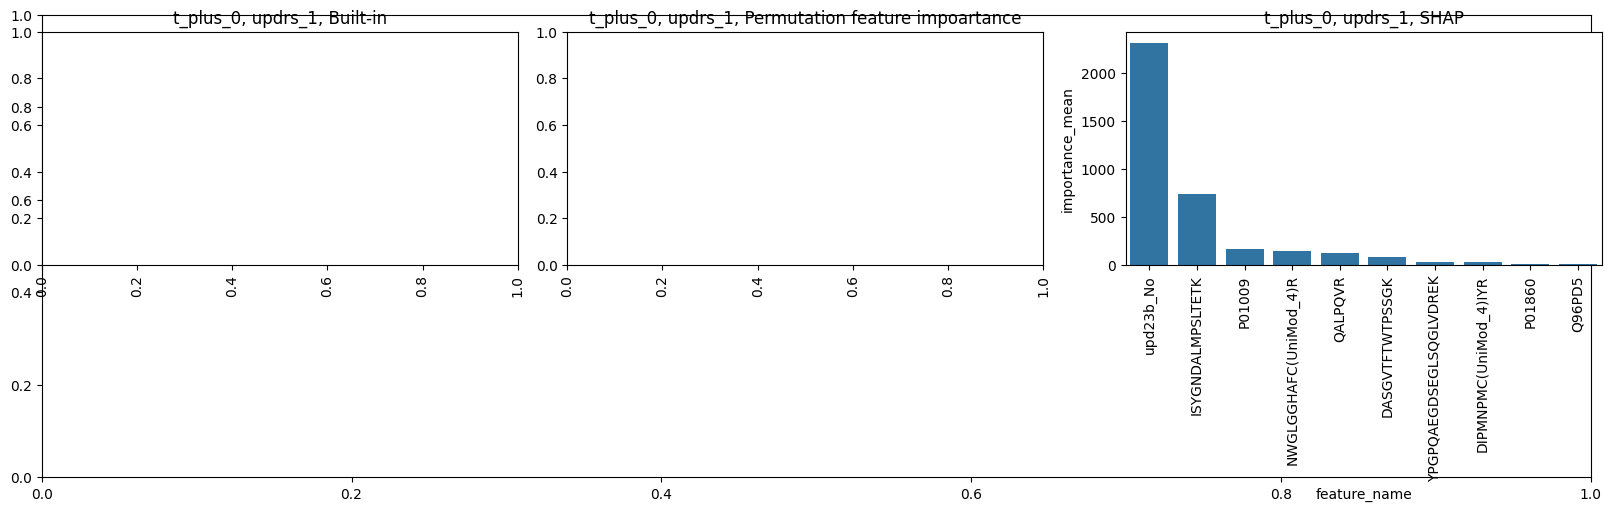

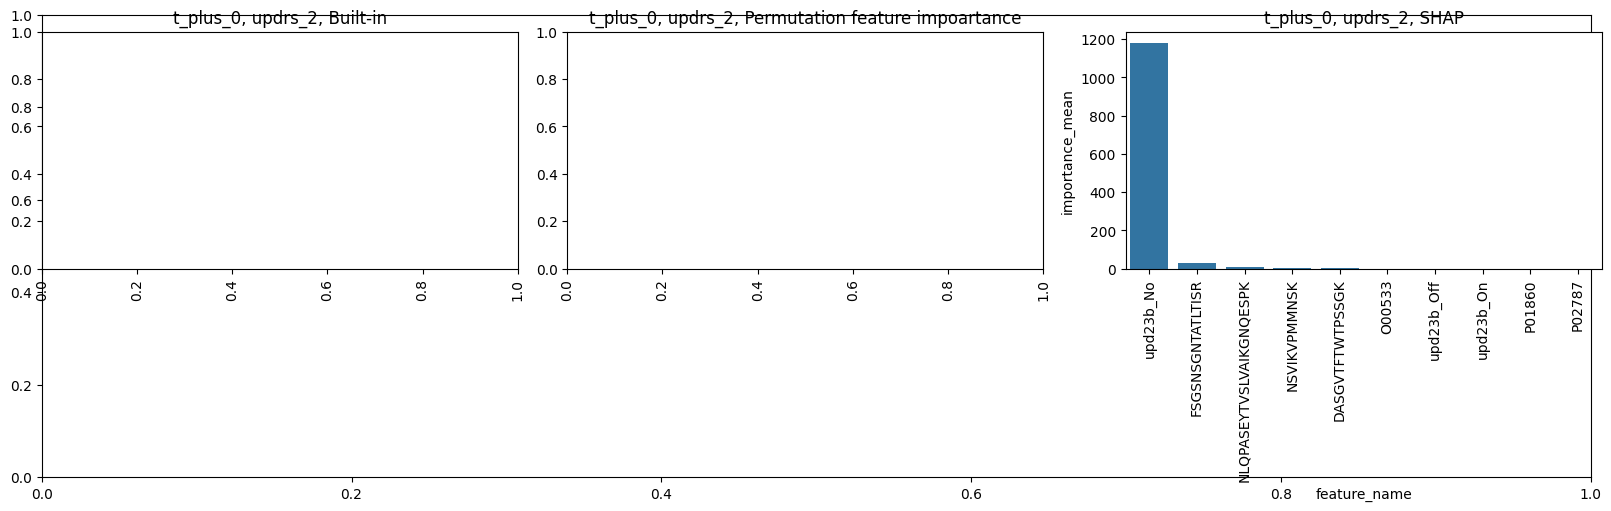

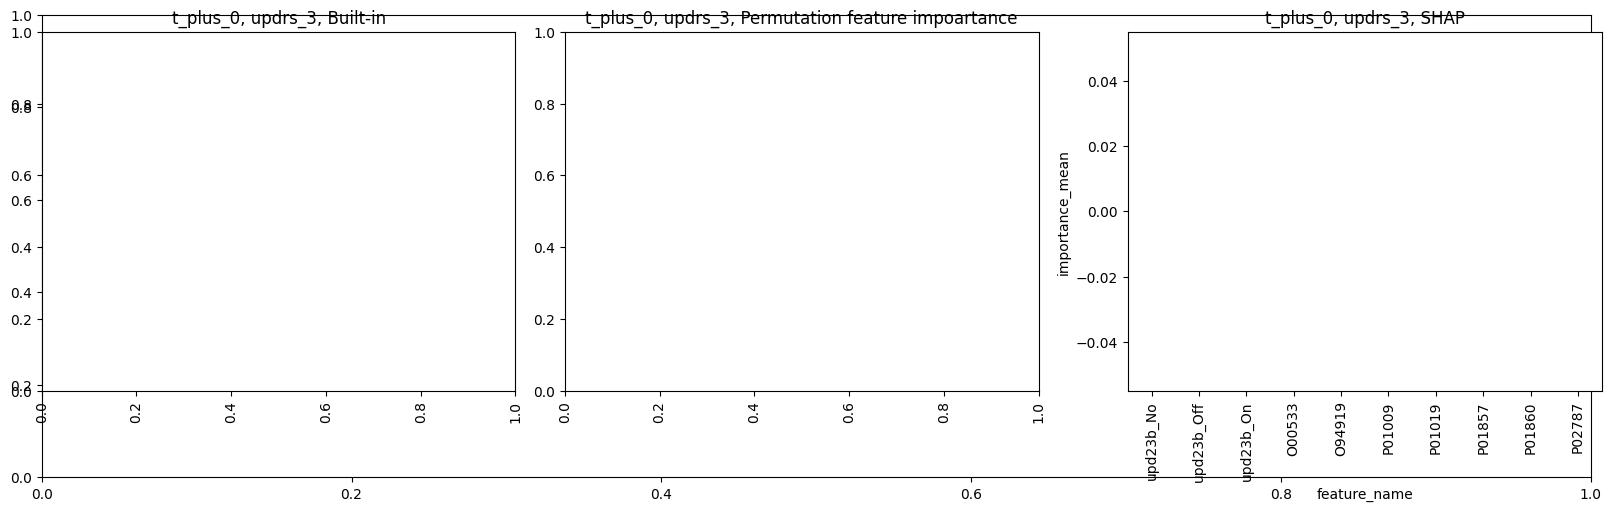

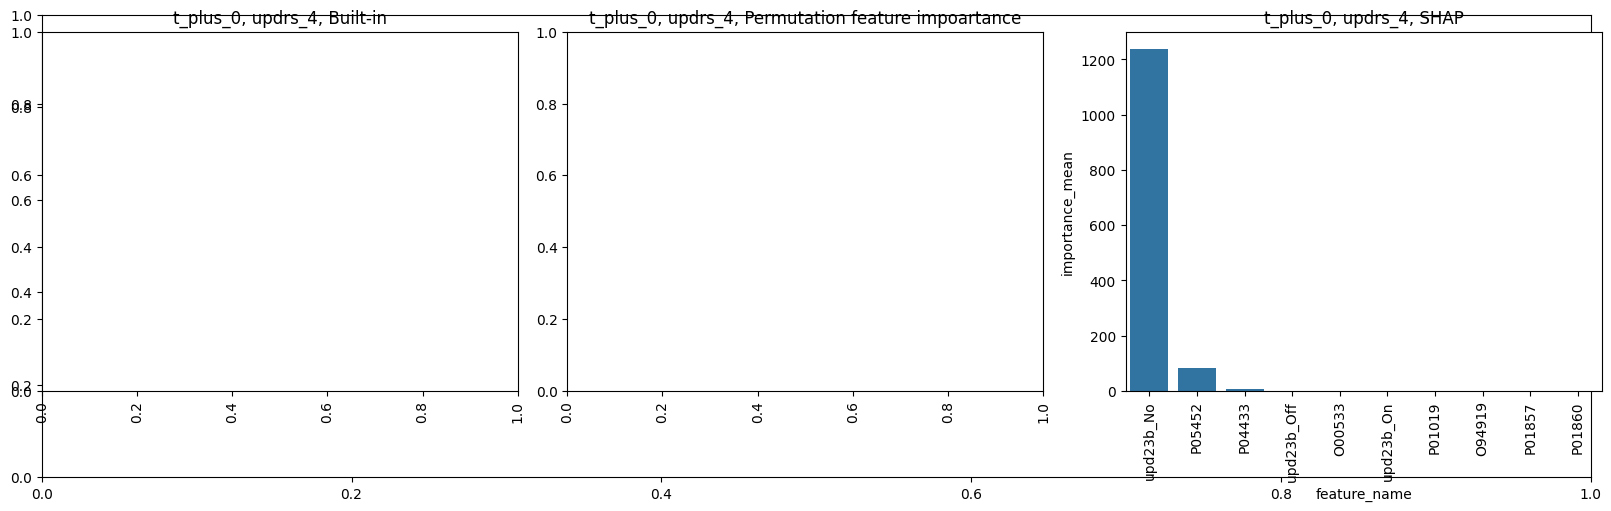

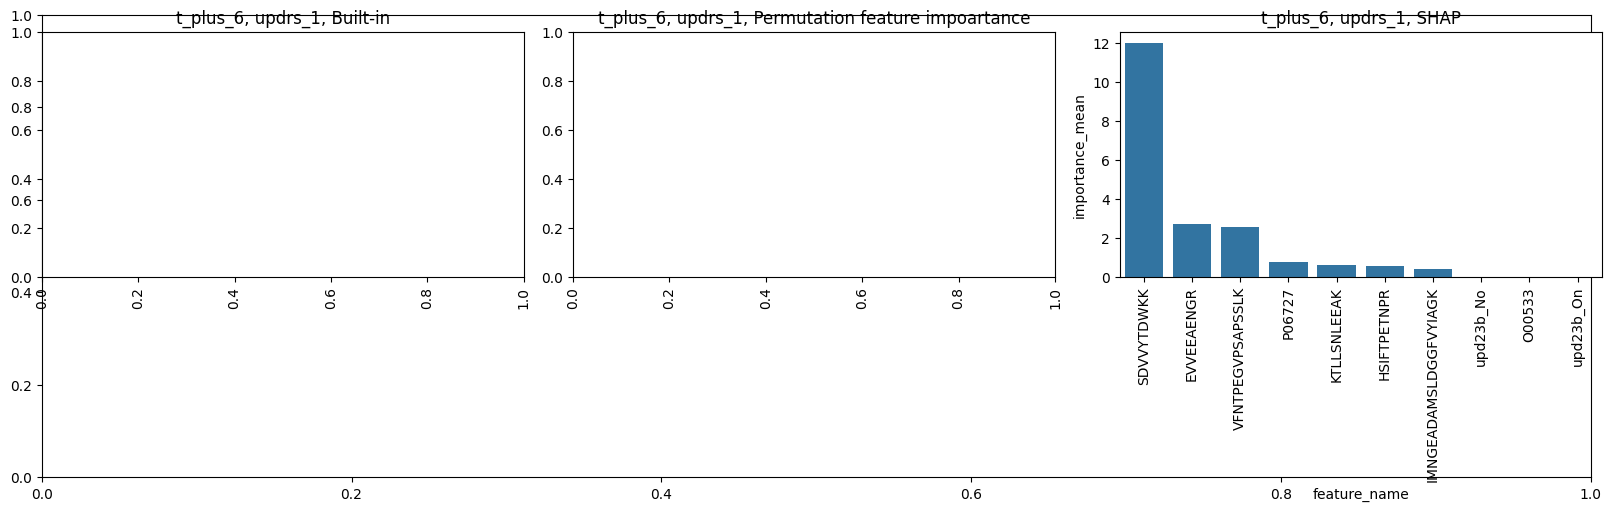

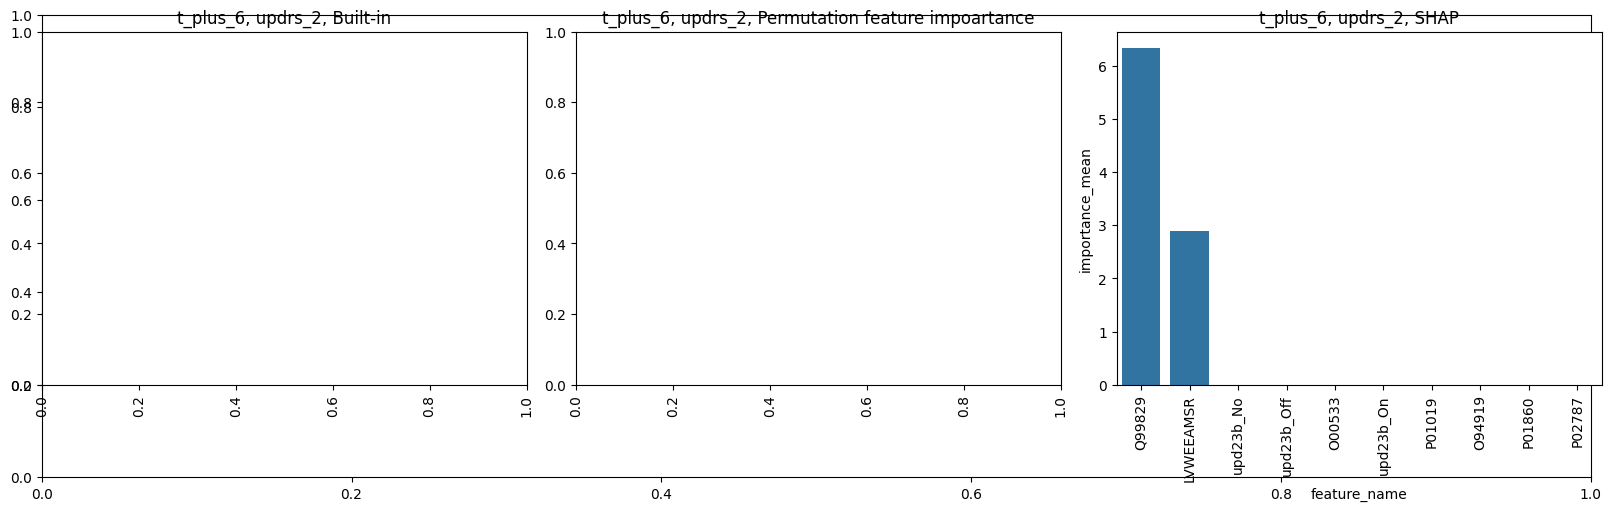

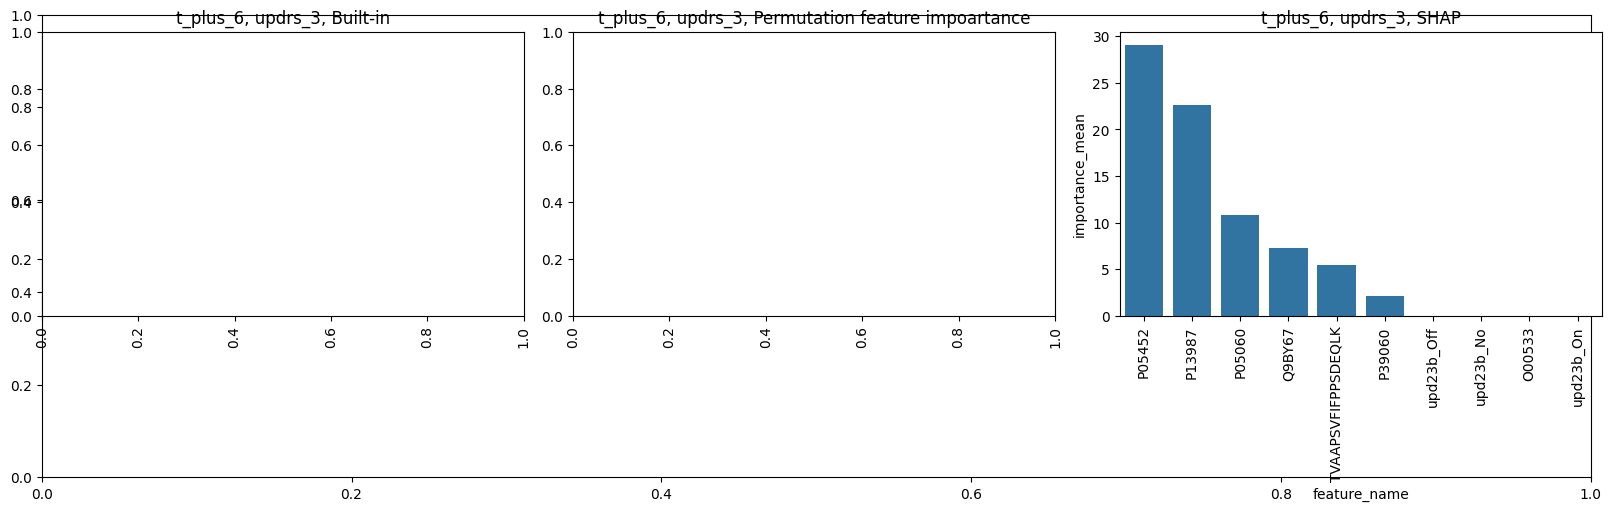

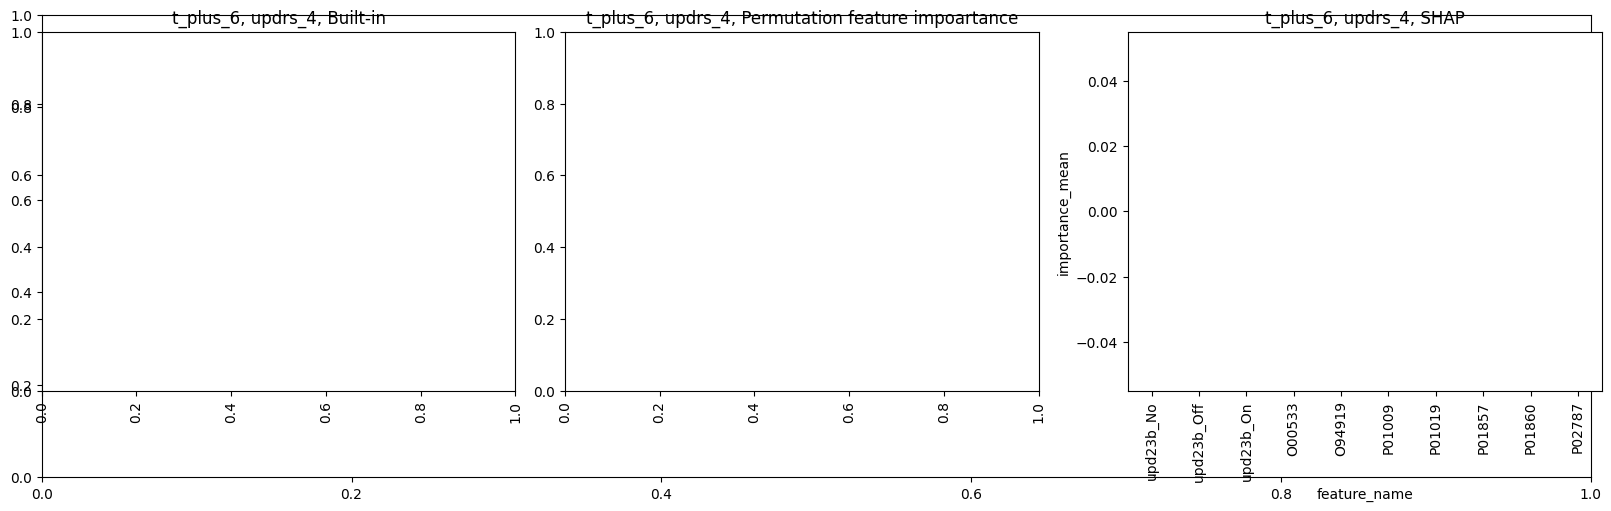

C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


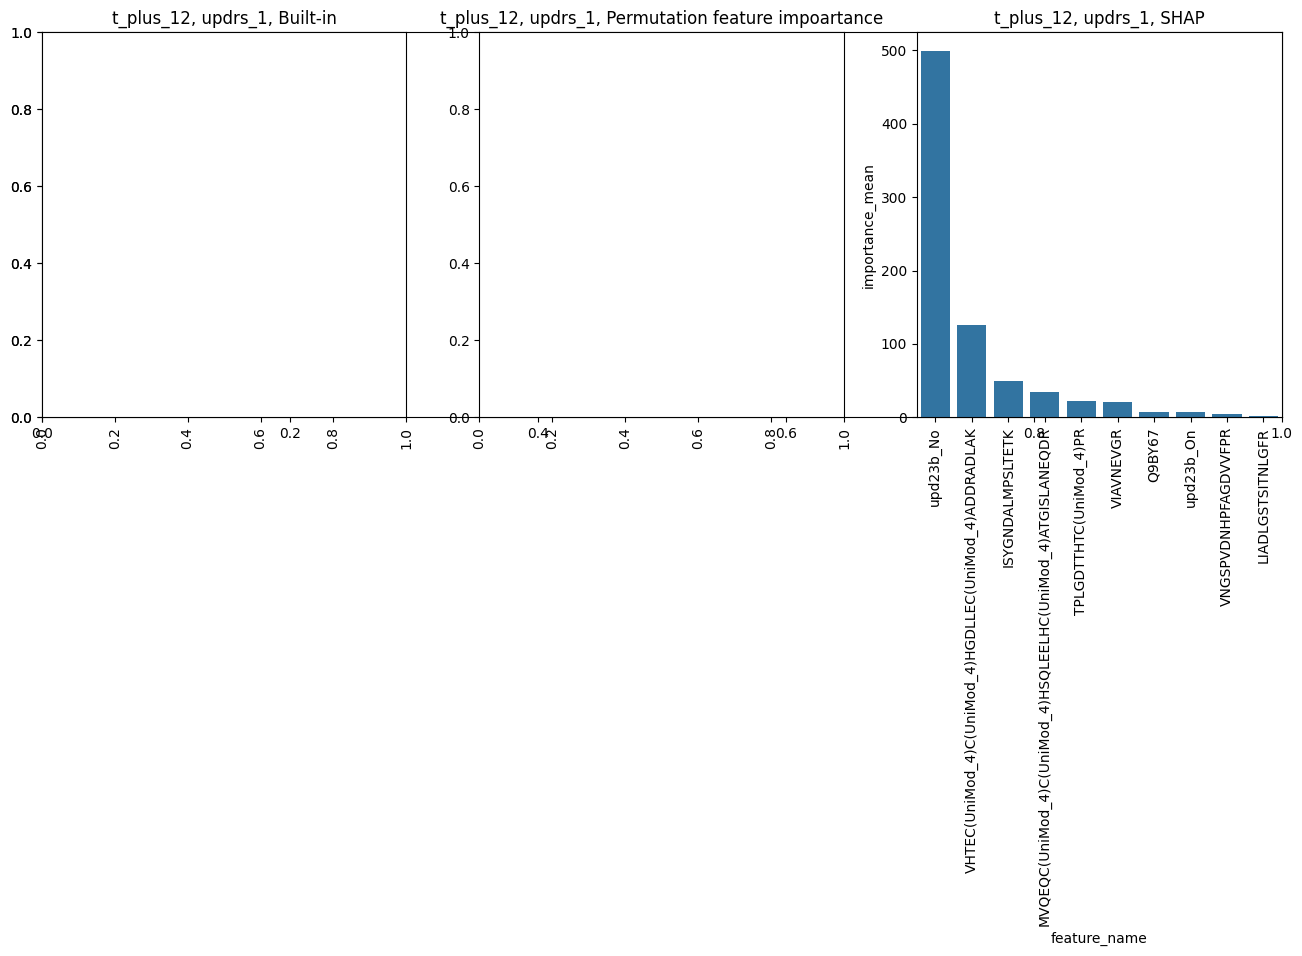

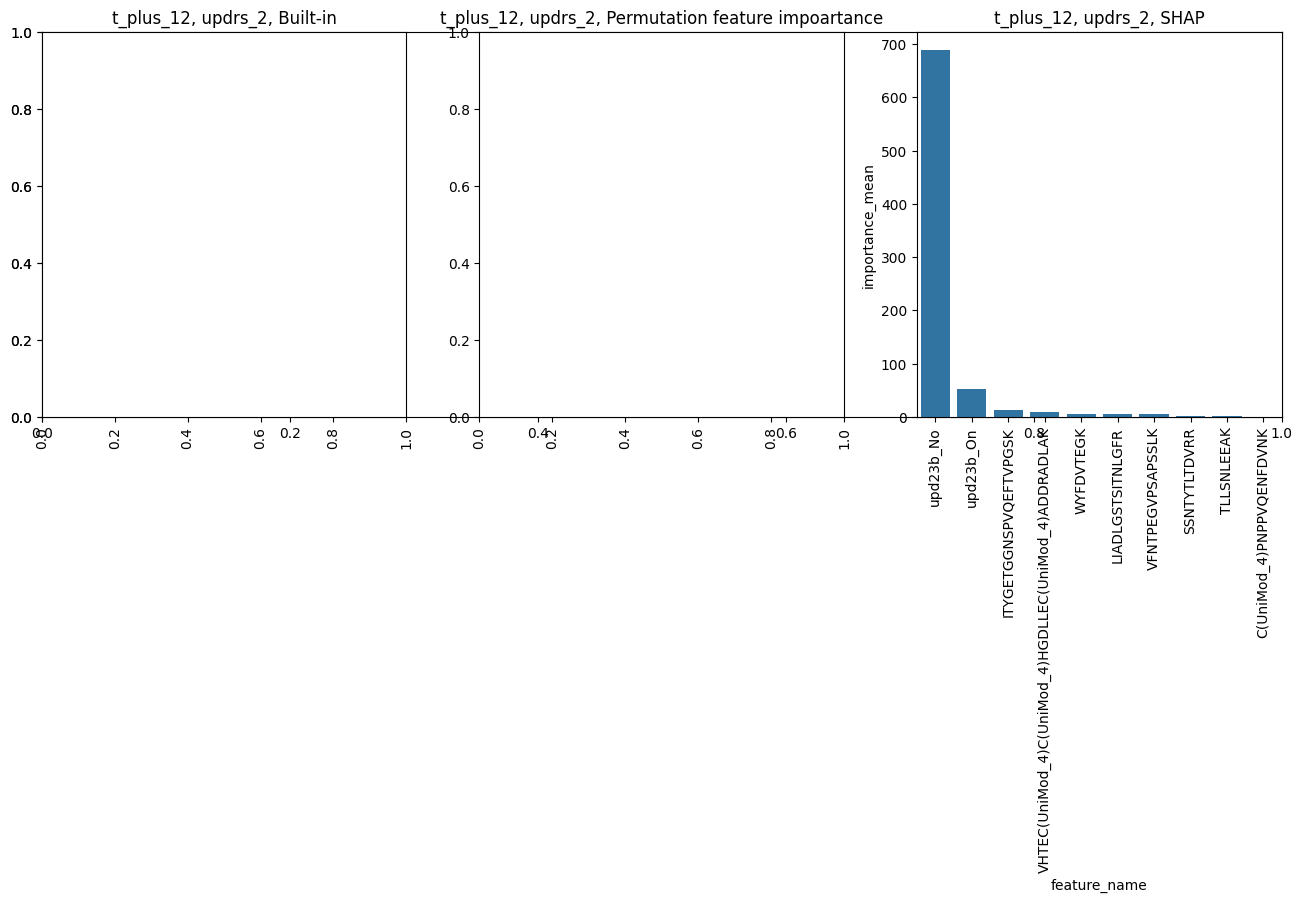

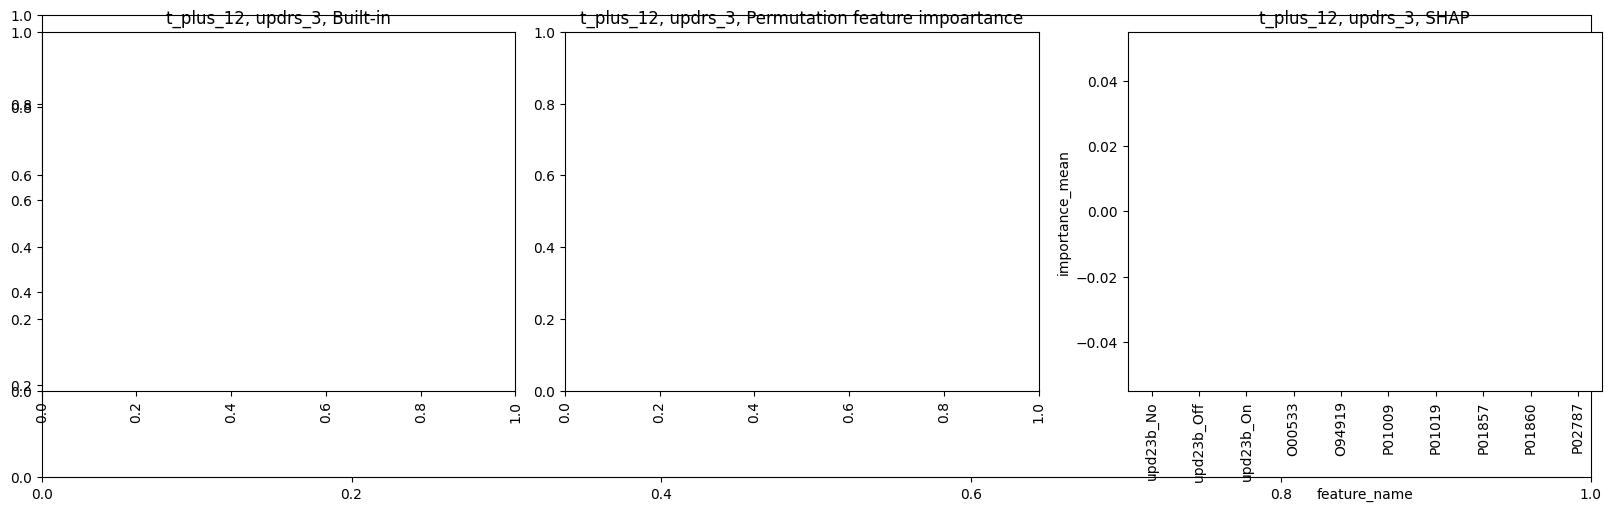

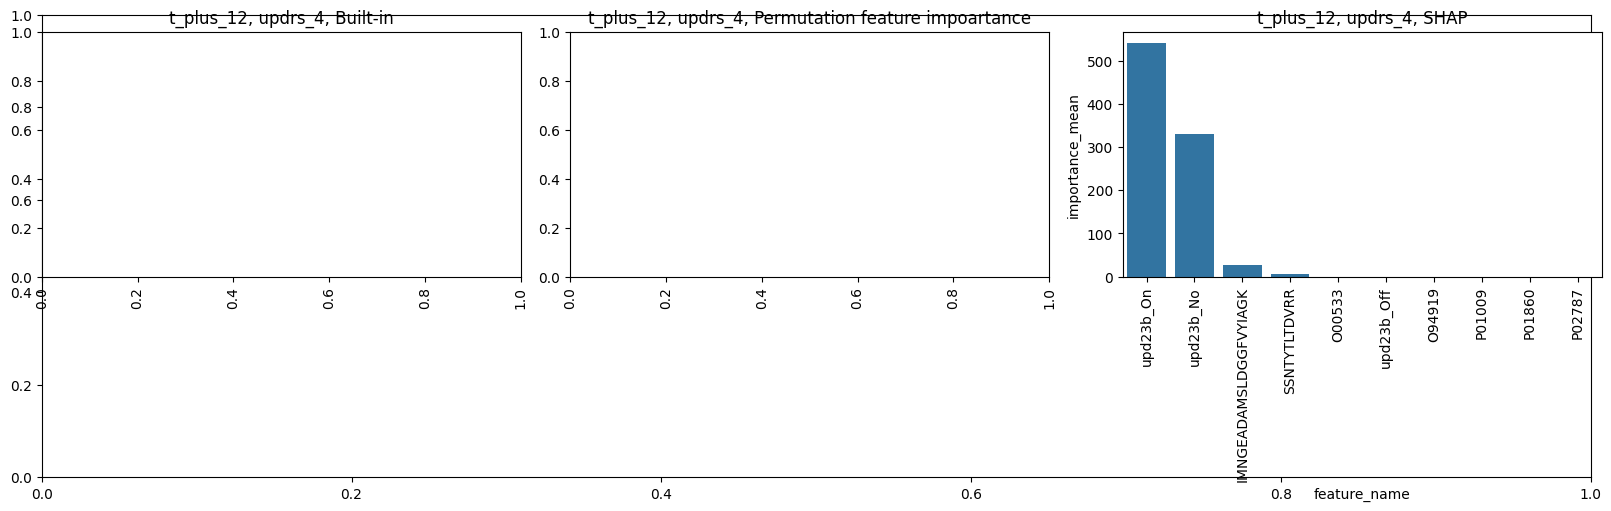

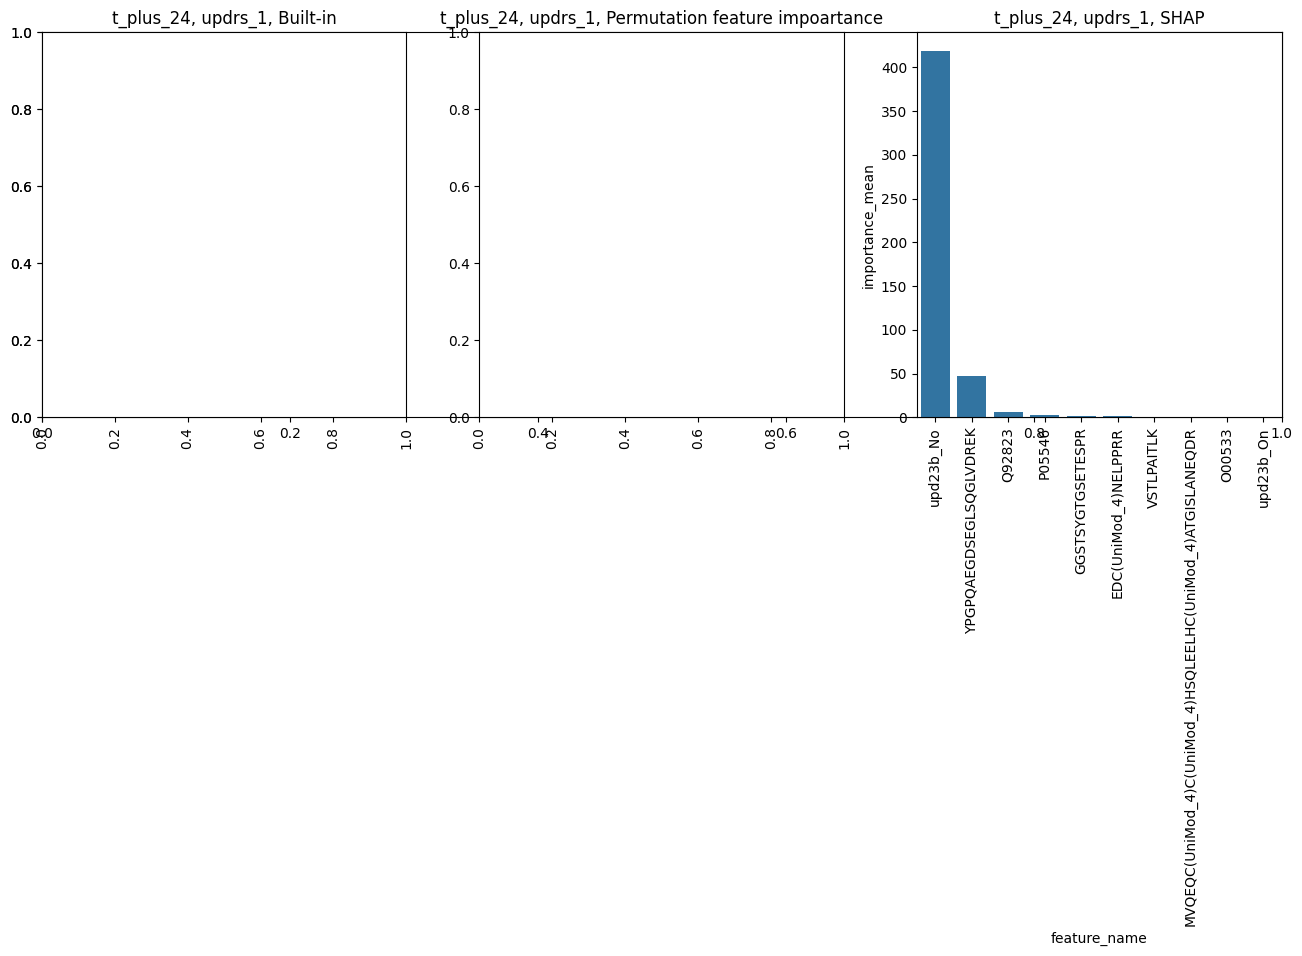

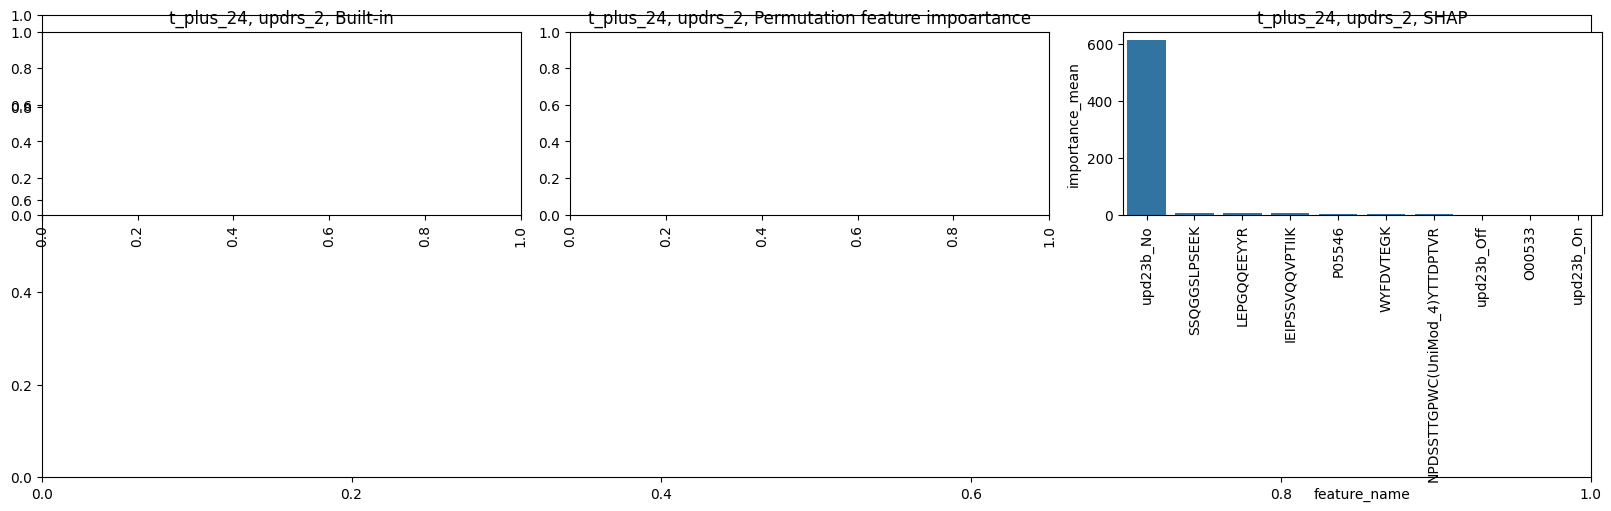

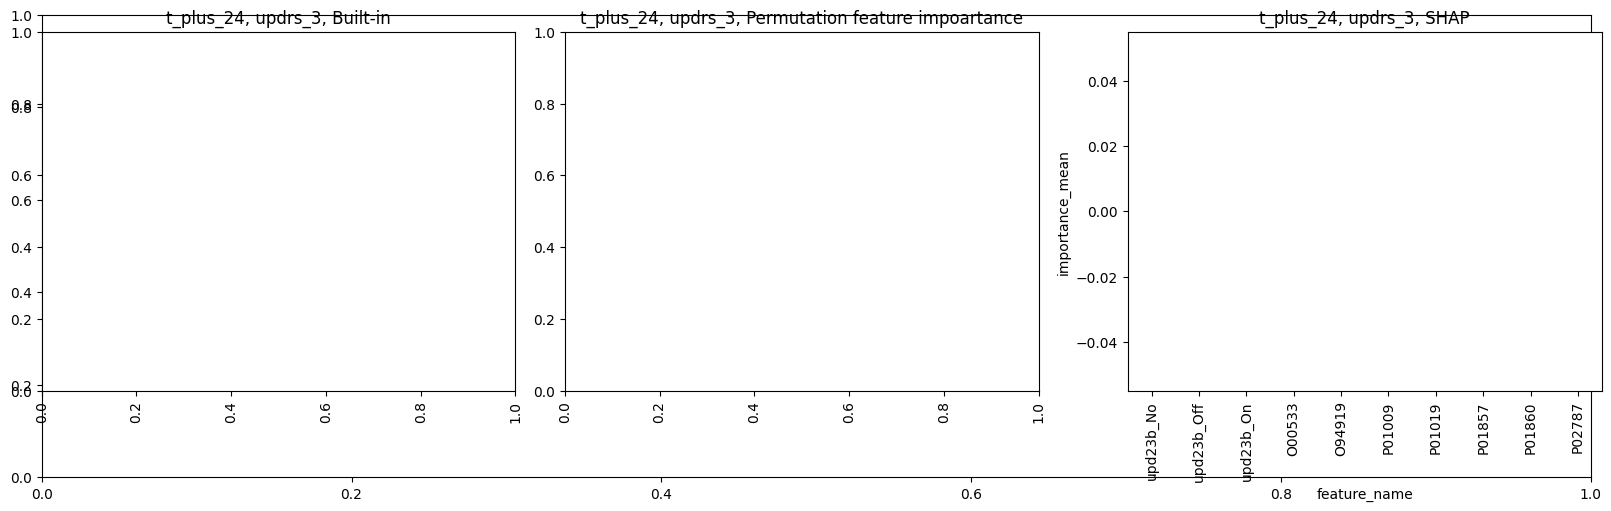

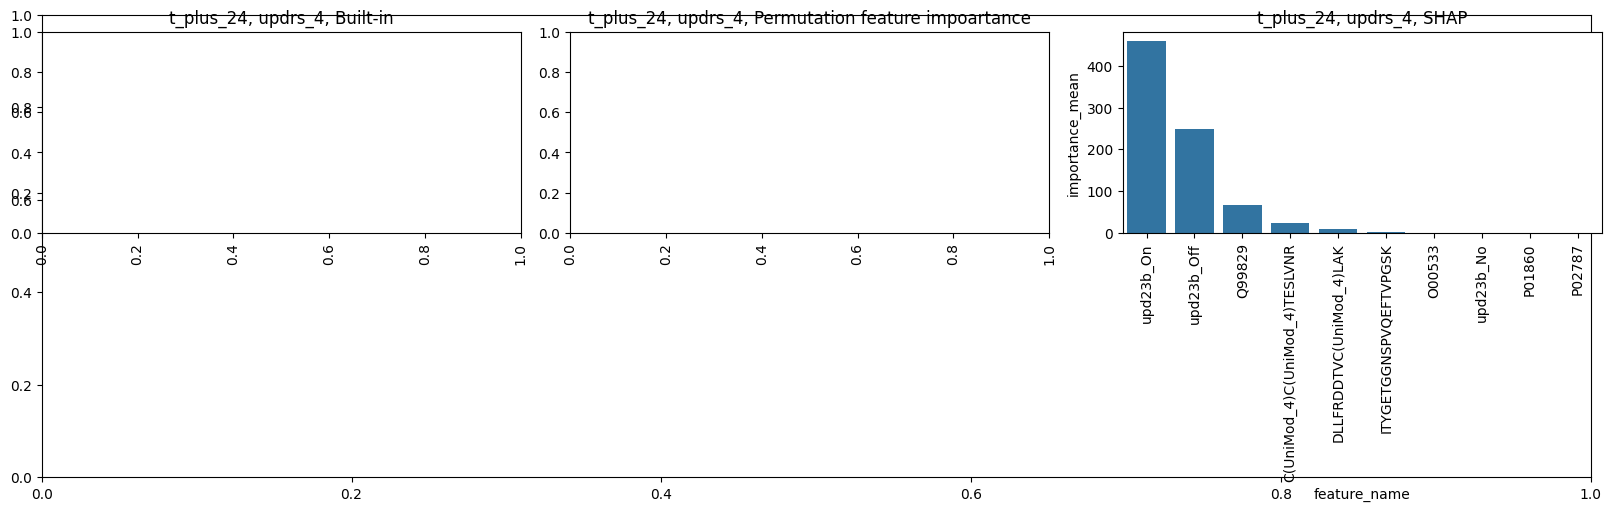

In [10]:
#Plotting results

df = pd.read_csv("feature_importances.csv")

for time_diff in ["t_plus_0","t_plus_6","t_plus_12","t_plus_24"]:
    for updrs in ['updrs_1','updrs_2','updrs_3','updrs_4']:
        plt.subplots(figsize=(16,5),constrained_layout=True)

        for idx, importance_type in enumerate(["Built-in","Permutation feature impoartance","SHAP"]):

            df_pick = df[(df['file_name'] ==time_diff) & (df['updrs'] ==updrs) & (df['importance_type'] ==importance_type)]
            df_sorted = df_pick.sort_values('importance_mean', ascending=False)

            plt.subplot(1, 3, idx+1)
            ax = sns.barplot(data = df_sorted.iloc[:10], x = "feature_name", y= "importance_mean")
            print(time_diff + ", " + updrs + ", " + importance_type,"|".join(list(df_sorted.iloc[:4]["feature_name"])))
            ax.set_title(time_diff + ", " + updrs + ", " + importance_type )
            ax.tick_params(axis='x', rotation=90)


In [11]:
df = pd.read_csv("feature_importances.csv")
['file_name', 'updrs', 'importance_type', 'feature_name', 'importance_mean', 'importance_std']
df = df[df['updrs'] != 'updrs_4']

df_b = df[df['importance_type']=='built_in']
df_p = df[df['importance_type']=='permutation feature impoartance']
df_s = df[df['importance_type']=='SHAP']

summed_df_b = df_b.groupby('feature_name')['importance_mean'].sum()
summed_df_p = df_p.groupby('feature_name')['importance_mean'].sum()
summed_df_s = df_s.groupby('feature_name')['importance_mean'].sum()



# rank the values in each DataFrame
ranked_df_b = summed_df_b.rank(method='dense', ascending=False)
ranked_df_p = summed_df_p.rank(method='dense', ascending=False)
ranked_df_s = summed_df_s.rank(method='dense', ascending=False)


# merge the ranked DataFrames
merged_df = pd.concat([ranked_df_b, ranked_df_p, ranked_df_s], axis=1)
merged_df.columns = ['Built_in','PFI','SHAP']
merged_df['average_rank'] = merged_df.mean(axis=1)

sorted_df =merged_df.sort_values('average_rank')
sorted_df = merged_df.sort_values('average_rank')

sorted_df_b =summed_df_b.sort_values(ascending=False)
sorted_df_p =summed_df_p.sort_values(ascending=False)
sorted_df_s =summed_df_s.sort_values(ascending=False)

sorted_df.to_csv('importance_ranking.csv')

In [12]:
df_0_y_train = df_0_data[updrs_list].iloc[0:170,:].values
df_0_y_test = df_0_data[updrs_list].iloc[170::,:].values
df_0_x_train = df_0_data.iloc[0:170,4::].values
df_0_x_test = df_0_data.iloc[170::,4::].values
Zinit = np.random.choice([x for xs in  df_0_x_train for x in xs],M)[:, None]
Zinit = np.reshape(Zinit, (-1, 141))

NameError: name 'df_0_data' is not defined

In [11]:
lower= - abs(np.min(df_0_x_test))
upper=np.max(df_0_x_test)
pX = np.linspace(lower, upper, 100)[:, None]
#pY, pYv = m.predict_y(pX)
pY, pYv = m.predict_y(df_0_x_test)
if pY.ndim == 3:
    pY = pY[:, 0, :]

plt.plot(df_0_x_train, df_0_y_train, "x")
plt.gca().set_prop_cycle(None)
plt.plot(pX, pY)
for i in range(pY.shape[1]):
    top = pY[:, i] + 2.0 * pYv[:, i] ** 0.5
    bot = pY[:, i] - 2.0 * pYv[:, i] ** 0.5
    plt.fill_between(pX[:, 0], top, bot, alpha=0.3)
plt.xlabel("X")
plt.ylabel("f")
plt.title(f"ELBO: {m.elbo([df_0_x_train,df_0_y_train]):.3}")
plt.plot(Z, Z * 0.0, "o")


NameError: name 'df_0_x_test' is not defined